# 1. Comments are given on each line of code for clarity

# 2. Implementing Gradient Descent Algorithm 

## First Task: Plotting the Function $f(x) = \sqrt{x^2 + 5}$

In this step, we defined the function 
$$
f(x) = \sqrt{x^2 + 5},
$$
and evaluated it over the interval $[-5, 5]$ using 400 evenly spaced points. We then plotted the resulting curve to visualize the behavior of the function. The plot includes axis labels, a title, and a grid for clarity.


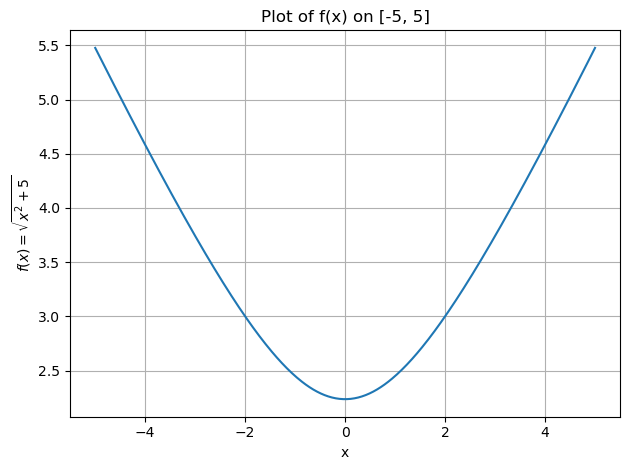

In [11]:
import numpy as np  # We import numpy as np so we can perform numerical computations
import matplotlib.pyplot as plt  # We import pyplot from matplotlib so we can create plots

def f(x):  # We define the function f so that it returns sqrt(x^2 + 5) for any input x
    return np.sqrt(x**2 + 5.0)  # We compute sqrt of x squared plus five elementwise and return the result

x_vals = np.linspace(-5.0, 5.0, 400)  # We create 400 evenly spaced points between minus five and five as our x values
f_vals = f(x_vals)  # We evaluate f at each x value so we obtain the corresponding function values

plt.figure()  # We open a new figure window to hold the plot
plt.plot(x_vals, f_vals)  # We plot the function values against the x values
plt.xlabel("x")  # We label the horizontal axis with x
plt.ylabel(r"$f(x)=\sqrt{x^2+5}$")  # We label the vertical axis with the formula for f expressed in LaTeX
plt.title("Plot of f(x) on [-5, 5]")  # We set a title that describes the function and the interval
plt.grid(True)  # We add a grid to the plot so we can read values more easily
plt.tight_layout()  # We adjust the layout so that labels and the title fit well in the figure
plt.savefig("task1_fx.png", dpi=300)  # We save the figure as a high resolution PNG file
plt.show()  # We display the completed plot



## Task1 Part 2: Gradient Descent on the Function f(x)

We computed the derivative of the function

$$
f(x) = \sqrt{x^2 + 5}
$$

and implemented a gradient descent routine to generate the sequence of iterates x_k. The initial value was chosen as

$$
x_0 = \frac{9}{5} + 1
$$

with a step size of 1.0 and a total of 50 iterations. After running the algorithm, we recorded the final iterate $x_T$ and evaluated $f(x_k)$ at each iteration. We then plotted $f(x_k)$ against the iteration number to visualize how the gradient descent method converged toward the minimum of the function.


Final iterate x_T = 7.136039372775195e-13


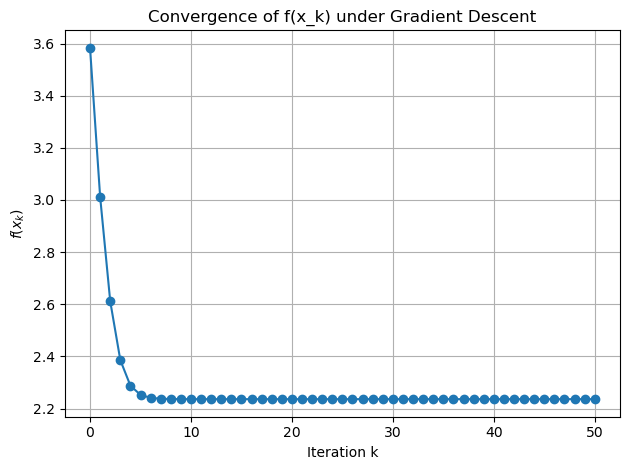

In [12]:
def grad_f(x):  # We define grad_f so that it computes the derivative f'(x) for any input x
    return x / np.sqrt(x**2 + 5.0)  # We compute x divided by sqrt(x^2 + 5) which is the gradient of f at x

def gradient_descent(x_0, step_size, num_iterations):  # We define a function to perform gradient descent on f
    xs = [x_0]  # We create a list xs to store all iterates and we initialize it with the starting point x_0
    for k in range(num_iterations):  # We loop over the total number of iterations to generate new x_k values
        g = grad_f(xs[-1])  # We compute the gradient of f at the most recent iterate xs[-1]
        x_new = xs[-1] - step_size * g  # We compute the updated value using the gradient descent update rule
        xs.append(x_new)  # We append the new iterate x_new to our list xs
    return np.array(xs, dtype=float)  # We convert xs to a NumPy array and return it so it is easier to work with

x_0 = 9/5 + 1  # We set the initial value x_0 according to the rule last_digit/5 + 1 using 9 as an example
step_size = 1.0  # We set the step size for gradient descent to one for this experiment
num_iterations = 50  # We set the number of gradient descent iterations to fifty as required

xs = gradient_descent(x_0, step_size, num_iterations)  # We call the gradient descent function to compute all iterates
x_T = xs[-1]  # We extract the final iterate x_T as the last element of the array xs

print("Final iterate x_T =", x_T)  # We print the value of x_T so we can compare with the analytic minimizer

f_vals = f(xs)  # We evaluate f at each iterate x_k so we can visualize the convergence of the algorithm
k_vals = np.arange(num_iterations + 1)  # We create an array of iteration indices corresponding to each x_k

plt.figure()  # We open a new figure window for the f(x_k) convergence plot
plt.plot(k_vals, f_vals, marker="o")  # We plot f(x_k) versus k using markers to show each point clearly
plt.xlabel("Iteration k")  # We label the horizontal axis with the iteration count
plt.ylabel(r"$f(x_k)$")  # We label the vertical axis with f(x_k) written in LaTeX
plt.title("Convergence of f(x_k) under Gradient Descent")  # We set a title that describes the purpose of the plot
plt.grid(True)  # We add a grid to help us see the decrease in function values
plt.tight_layout()  # We adjust the layout so that nothing is clipped
plt.savefig("task1_fk.png", dpi=300)  # We save the figure as a high resolution PNG file
plt.show()  # We display the completed plot


## Task1 Part C: Comparison of Gradient Descent Behavior for Multiple Step Sizes

In this part of the assignment, we examined how different step sizes affect the behavior of the gradient descent algorithm when minimizing the function

$$
f(x) = \sqrt{x^2 + 5}.
$$

We selected the step sizes

$$
5.0,\quad 3.0,\quad 1.0,\quad 0.5
$$

and ran gradient descent for each value starting from the same initial point and using the same number of iterations. For each run, we computed the quantity

$$
f(x_{k-1}) - f(x_k)
$$

which represents the decrease in the objective function from one iteration to the next. This value is positive when gradient descent successfully reduces the function and negative when the step size is too large and causes the algorithm to move in a direction that increases the function value.

For every step size, we plotted the sequence of differences on the same graph so we could visually compare how the algorithm behaved under each choice of step size.

The overall results show that smaller step sizes produce stable and consistent decreases in the function value at each iteration, while larger step sizes exhibit more variability. In general, moderate step sizes lead to the smoothest and most reliable decrease in the objective function, demonstrating the importance of choosing an appropriate step size for gradient descent.


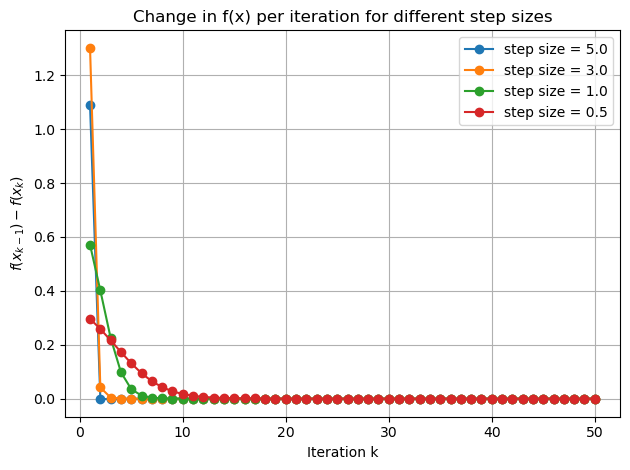

In [13]:
step_sizes = [5.0, 3.0, 1.0, 0.5]  # We create a list of step sizes that we want to test in gradient descent

diff_lists = []  # We create an empty list so we can store the sequences f(x_{k-1}) - f(x_k) for each step size

for alpha in step_sizes:  # We loop through each step size alpha in our list of step sizes
    xs_alpha = gradient_descent(x_0, alpha, num_iterations)  # We run gradient descent with the current step size alpha
    fs_alpha = f(xs_alpha)  # We evaluate f at every iterate for this run so we get the sequence f(x_k)
    diffs = fs_alpha[:-1] - fs_alpha[1:]  # We compute the difference f(x_{k-1}) minus f(x_k) for every iteration
    diff_lists.append(diffs)  # We append the sequence of differences for this alpha to our list diff_lists

k_vals_diff = np.arange(1, num_iterations + 1)  # We create an array of iteration indices from one to num_iterations

plt.figure()  # We open a new figure so that we can plot all the difference curves together
for i, alpha in enumerate(step_sizes):  # We loop over the indices of the step sizes and the step sizes themselves
    plt.plot(k_vals_diff, diff_lists[i], marker="o", label=f"step size = {alpha}")  # We plot the differences for this alpha with a label
plt.xlabel("Iteration k")  # We label the horizontal axis with the iteration index k
plt.ylabel(r"$f(x_{k-1}) - f(x_k)$")  # We label the vertical axis with the difference in function values between steps
plt.title("Change in f(x) per iteration for different step sizes")  # We set the title to describe the comparison of step sizes
plt.grid(True)  # We add a grid to the plot so we can inspect changes more clearly
plt.legend()  # We add a legend so that we can identify which curve corresponds to which step size
plt.tight_layout()  # We adjust the layout so that all labels and the legend are fully visible
plt.savefig("task1_fk.png", dpi=300)  # We save the figure as a high resolution PNG file
plt.show()  # We display the final plot with all curves drawn together


# 3. Linear Regression with Numpy and Graphing with Matplotlib

## Linear Regression with Two-Dimensional Synthetic Data

In this task, we performed linear regression on synthetic data with two input features. We generated 100 random data points using a fixed random seed set to the last two digits of the student ID, which in this case is 86. Each data point has two features, denoted by $x_1$ and $x_2$, and the target values were generated from the model

$$
y = 4 + 4 x_1 + 0.5 x_2 + \varepsilon,
$$

where $\varepsilon$ represents Gaussian noise.

To fit a linear regression model to this data, we constructed a design matrix by adding a column of ones to the feature matrix so that we could include an intercept term. We then used the normal equation

$$
\theta = (X^\top X)^{-1} X^\top y,
$$

to estimate the parameter vector $\theta$, which contains the intercept and the coefficients associated with $x_1$ and $x_2$.

From the computation, the estimated parameters were:

- Estimated intercept: $3.854717712607228$
- Estimated coefficient for $x_1$: $4.120055008900198$
- Estimated coefficient for $x_2$: $0.5814333063912728$

These estimated values are close to the true underlying parameters $4$, $4$, and $0.5$ used to generate the data, indicating that the normal equation provides a reliable approximation of the underlying model.

Finally, we created a three-dimensional plot showing the data points in the $(x_1, x_2, y)$ space along with the fitted regression plane

$$
\hat{y} = b + w_1 x_1 + w_2 x_2,
$$

where $b$ is the estimated intercept and $w_1$ and $w_2$ are the estimated coefficients. This visualization demonstrates how the regression plane models the relationship between the two features and the target variable.


Estimated intercept = 3.854717712607228
Estimated coefficient w1 = 4.120055008900198
Estimated coefficient w2 = 0.5814333063912728


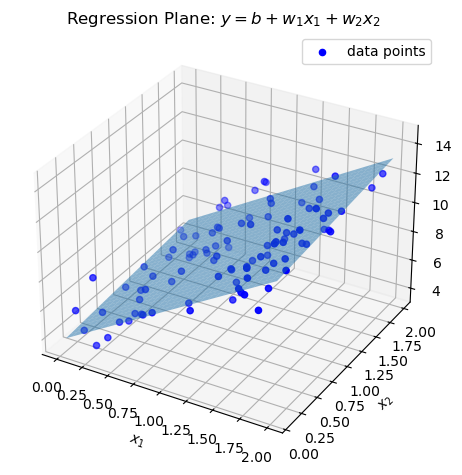

In [14]:
import numpy as np  # We import numpy so we can generate data and perform matrix computations
import matplotlib.pyplot as plt  # We import pyplot so we can create plots including 3D visualizations

np.random.seed(86)  # We set the random seed to the last two digits of our student ID to make the results reproducible

X = 2 * np.random.rand(100, 2)  # We generate one hundred random two dimensional feature vectors scaled by two
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # We compute target values using a linear model with added Gaussian noise

ones_column = np.ones((X.shape[0], 1))  # We create a column of ones so we can represent the intercept term in the design matrix
X_design = np.hstack((ones_column, X))  # We build the design matrix by stacking the ones column with the feature matrix X

XtX = X_design.T @ X_design  # We compute X transpose times X which is part of the normal equation
Xty = X_design.T @ y  # We compute X transpose times y which is the right hand side of the normal equation
theta = np.linalg.solve(XtX, Xty)  # We solve the normal equation to obtain the parameter vector theta

intercept = theta[0]  # We extract the intercept term from the first entry of theta
w1 = theta[1]  # We extract the coefficient corresponding to the first feature x1
w2 = theta[2]  # We extract the coefficient corresponding to the second feature x2

print("Estimated intercept =", intercept)  # We print the estimated intercept so we can inspect the fitted model
print("Estimated coefficient w1 =", w1)  # We print the estimated coefficient for the first feature
print("Estimated coefficient w2 =", w2)  # We print the estimated coefficient for the second feature

fig = plt.figure()  # We create a new figure that will contain the 3D scatter plot and regression plane
ax = fig.add_subplot(111, projection="3d")  # We add a 3D subplot to the figure so we can plot in three dimensions

ax.scatter(X[:, 0], X[:, 1], y, color="blue", label="data points")  # We plot the generated data points as a blue 3D scatter

x1_min, x1_max = X[:, 0].min(), X[:, 0].max()  # We find the minimum and maximum of the first feature to define the grid range
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()  # We find the minimum and maximum of the second feature to define the grid range
x1_grid = np.linspace(x1_min, x1_max, 30)  # We create a grid of thirty values along the x1 axis
x2_grid = np.linspace(x2_min, x2_max, 30)  # We create a grid of thirty values along the x2 axis
X1, X2 = np.meshgrid(x1_grid, x2_grid)  # We create two 2D grid arrays from x1_grid and x2_grid for the surface plot

Y_plane = intercept + w1 * X1 + w2 * X2  # We compute the predicted y values on the grid to form the regression plane

ax.plot_surface(X1, X2, Y_plane, alpha=0.5)  # We draw the regression plane as a semi transparent surface over the feature grid

ax.set_xlabel(r"$x_1$")  # We label the x axis as x1 using LaTeX formatting
ax.set_ylabel(r"$x_2$")  # We label the y axis as x2 using LaTeX formatting
ax.set_zlabel(r"$y$")  # We label the z axis as y to represent the target variable
ax.set_title(r"Regression Plane: $y = b + w_1 x_1 + w_2 x_2$")  # We set a title that shows the general form of the regression model
ax.legend()  # We display the legend so we can identify the data points in the plot
plt.tight_layout()  # We adjust the layout so that labels and the title fit well in the figure
plt.savefig("task2_plane.png", dpi=300)
plt.show()  # We display the final 3D plot showing the data and the regression plane 


# 4. Logistic Regression with Numpy and Graphing with Matplotlib

## Logistic Regression with Numpy

In this task, we implemented logistic regression to perform binary classification on a synthetic dataset consisting of two classes. Each class was generated from a two-dimensional Gaussian distribution with different means but the same covariance structure. The combined dataset was divided into training and testing sets.

We used the logistic function

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

and trained the model using gradient descent for **1000 epochs**. At each epoch, we computed the cross-entropy loss

$$
L = -\frac{1}{n} \sum_{i=1}^n \Big[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \Big],
$$

and updated the model parameters using the gradients with respect to the weight vector and bias term. The learning rate and the total number of epochs were selected so that the loss decreased smoothly and the model parameters converged to stable values.

After training, we evaluated the model on both the training and testing datasets. The results were:

- Training accuracy: **0.98**
- Testing accuracy: **1.0**

These high accuracy values show that the logistic regression model successfully learned a decision boundary that separates the two classes with very few misclassifications. We then visualized the two training classes and plotted the learned decision boundary, which represents the set of points where the predicted class probability equals one half.


Training accuracy: 0.98
Testing accuracy: 1.0


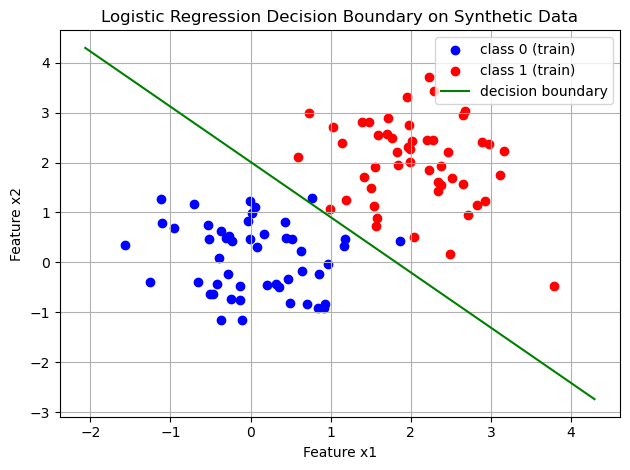

In [16]:
import numpy as np  # We import numpy so we can work with arrays and perform numerical computations
import matplotlib.pyplot as plt  # We import matplotlib so we can visualize the data and the decision boundary

def logistic(z):  # We define the logistic function which maps any real input to a value between zero and one
    return 1.0 / (1.0 + np.exp(-z))  # We compute the logistic function elementwise using the standard sigmoid formula

np.random.seed(86)  # We set the random seed to the last two digits of our student ID so that the results are reproducible

num_train_per_class = 50  # We choose the number of training samples for each of the two classes
num_test_per_class = 25  # We choose the number of testing samples for each of the two classes

mean_class0 = np.array([0.0, 0.0])  # We define the mean of the first class in the two dimensional feature space
mean_class1 = np.array([2.0, 2.0])  # We define the mean of the second class in the two dimensional feature space
covariance = 0.5 * np.eye(2)  # We define an isotropic covariance matrix that controls the spread of each class

X0_train = np.random.multivariate_normal(mean_class0, covariance, num_train_per_class)  # We generate training samples for class zero
X1_train = np.random.multivariate_normal(mean_class1, covariance, num_train_per_class)  # We generate training samples for class one
X_train = np.vstack((X0_train, X1_train))  # We stack the training samples from both classes into a single feature matrix
y_train = np.hstack((np.zeros(num_train_per_class), np.ones(num_train_per_class)))  # We create the training labels with zeros for class zero and ones for class one

X0_test = np.random.multivariate_normal(mean_class0, covariance, num_test_per_class)  # We generate testing samples for class zero
X1_test = np.random.multivariate_normal(mean_class1, covariance, num_test_per_class)  # We generate testing samples for class one
X_test = np.vstack((X0_test, X1_test))  # We stack the testing samples from both classes into a single feature matrix
y_test = np.hstack((np.zeros(num_test_per_class), np.ones(num_test_per_class)))  # We create the testing labels with zeros for class zero and ones for class one

learning_rate = 0.1  # We set the learning rate which controls the size of each gradient descent update
num_epochs = 1000  # We set the number of epochs for training so the model has enough steps to converge
num_features = X_train.shape[1]  # We determine the number of features from the second dimension of X_train
w = np.zeros(num_features)  # We initialize the weight vector w with zeros so we start from a neutral model
b = 0.0  # We initialize the bias term b with zero

loss_history = []  # We create a list to store the loss value at each epoch so we can monitor convergence

for epoch in range(num_epochs):  # We loop over the specified number of epochs to update the parameters repeatedly
    z_train = X_train @ w + b  # We compute the linear scores z for all training samples using the current parameters
    y_hat_train = logistic(z_train)  # We apply the logistic function to obtain predicted probabilities for class one
    eps = 1e-10  # We define a small constant to avoid numerical issues when taking the logarithm of probabilities
    loss = -np.mean(y_train * np.log(y_hat_train + eps) + (1.0 - y_train) * np.log(1.0 - y_hat_train + eps))  # We compute the average cross entropy loss over the training set
    loss_history.append(loss)  # We record the current loss value so we can examine how it changes during training
    grad_w = X_train.T @ (y_hat_train - y_train) / X_train.shape[0]  # We compute the gradient of the loss with respect to the weight vector w
    grad_b = np.mean(y_hat_train - y_train)  # We compute the gradient of the loss with respect to the bias term b
    w = w - learning_rate * grad_w  # We update the weight vector by stepping in the opposite direction of the gradient
    b = b - learning_rate * grad_b  # We update the bias term by stepping in the opposite direction of the gradient

z_train_final = X_train @ w + b  # We compute the final linear scores for all training samples using the trained parameters
y_hat_train_final = logistic(z_train_final)  # We convert the final scores into probabilities using the logistic function
y_pred_train = (y_hat_train_final >= 0.5).astype(int)  # We threshold the probabilities at one half to obtain binary training predictions
train_accuracy = np.mean(y_pred_train == y_train)  # We compute the training accuracy as the fraction of correctly classified training samples

z_test_final = X_test @ w + b  # We compute the final linear scores for all testing samples using the trained parameters
y_hat_test_final = logistic(z_test_final)  # We convert the final scores for the test set into probabilities
y_pred_test = (y_hat_test_final >= 0.5).astype(int)  # We threshold the test probabilities at one half to obtain binary test predictions
test_accuracy = np.mean(y_pred_test == y_test)  # We compute the testing accuracy as the fraction of correctly classified testing samples

print("Training accuracy:", train_accuracy)  # We print the training accuracy so we can see how well the model fits the training data
print("Testing accuracy:", test_accuracy)  # We print the testing accuracy so we can see how well the model generalizes to unseen data

plt.figure()  # We open a new figure for plotting the training data and the decision boundary
plt.scatter(X0_train[:, 0], X0_train[:, 1], color="blue", label="class 0 (train)")  # We plot the training samples from class zero in blue
plt.scatter(X1_train[:, 0], X1_train[:, 1], color="red", label="class 1 (train)")  # We plot the training samples from class one in red

x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5  # We define the range of x1 values for plotting the decision boundary
x1_plot = np.linspace(x1_min, x1_max, 200)  # We create a dense grid of x1 values so the decision boundary appears smooth
if np.abs(w[1]) > 1e-8:  # We check that the weight for the second feature is not effectively zero to avoid dividing by zero
    x2_plot = -(w[0] * x1_plot + b) / w[1]  # We compute the corresponding x2 values along the decision boundary where the model output is one half
    plt.plot(x1_plot, x2_plot, color="green", label="decision boundary")  # We plot the decision boundary as a green line
plt.xlabel("Feature x1")  # We label the horizontal axis as feature x1
plt.ylabel("Feature x2")  # We label the vertical axis as feature x2
plt.title("Logistic Regression Decision Boundary on Synthetic Data")  # We set the title to describe the logistic regression model and plot
plt.legend()  # We display the legend so we can distinguish between the two classes and the decision boundary
plt.grid(True)  # We add a grid to the plot to make the geometric separation easier to interpret
plt.tight_layout()  # We adjust the layout so that all elements are clearly visible
plt.savefig("task3_boundary.png", dpi=300)
plt.show()  # We display the final plot showing the training data and the learned decision boundary
